In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
def gender_value_to_label(value):
    if value == 0:
        return "Male"
    return "Female"


def getGender(pred_sex):
    index_maxValue = pred_sex.argmax()
    if index_maxValue == 0:
        return "Male"
    return "Female"


def getRangeAge(pred_age):
    arrRangeAge = ["0-14", "14-25", "25-40", "40-60", "60-116"]
    maxIndex = list(pred_age[0]).index(max(pred_age[0]))
    rangeAge = arrRangeAge[maxIndex] + " years old"
    return rangeAge

In [20]:
df = pd.read_csv("age_gender.csv")
df = df.drop("img_name", axis=1)
df.head()

,age,ethnicity,gender,pixels
0,1,0,0,252 252 254 235 228 215 203 195 193 192 191 19...
1,1,0,0,234 234 234 234 233 229 218 220 216 217 214 21...
2,1,0,0,210 206 169 161 166 172 173 176 177 190 198 20...
3,1,0,0,155 176 207 212 212 216 211 214 219 226 228 23...
4,1,0,0,96 138 173 204 223 215 211 212 207 206 204 195...


In [21]:
columns = ["age","gender","ethnicity"]
x = df.drop(columns, axis = 1)

In [23]:
# Reshape Data
x = pd.Series(x['pixels'])
x = x.apply(lambda x: np.reshape(np.array(x.split(' '), dtype='float32'), (48, 48)))
print(x[0])

[[252. 252. 254. ... 134. 133. 129.]
 [252. 252. 252. ... 134. 133. 129.]
 [249. 249. 251. ... 135. 132. 128.]
 ...
 [226. 225. 224. ... 144. 140. 149.]
 [228. 228. 225. ... 154. 160. 166.]
 [228. 228. 226. ... 169. 170. 173.]]


index: 19
Actual:
Age: 1
Sex: Male


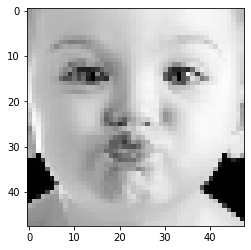

1/1 [==============================] - 1s 1s/step
Predicted EfficientNetB0 model:
Age: 0-14: 100.0%, 14-25: 0.0%, 25-40: 0.0%, 40-60: 0.0%, 60-116: 0.0%
-> 0-14 years old
Sex: Male: 88.85%, Female: 11.15%
-> Male
1/1 [==============================] - 2s 2s/step
Predicted EfficientNetB2 model:
Age: 0-14: 99.88%, 14-25: 0.06%, 25-40: 0.03%, 40-60: 0.0%, 60-116: 0.02%
-> 0-14 years old
Sex: Male: 90.4%, Female: 9.6%
-> Male
1/1 [==============================] - 2s 2s/step
Predicted EfficientNetB4 model:
Age: 0-14: 98.83%, 14-25: 0.66%, 25-40: 0.4%, 40-60: 0.08%, 60-116: 0.03%
-> 0-14 years old
Sex: Male: 56.24%, Female: 43.76%
-> Male
1/1 [==============================] - 4s 4s/step
Predicted EfficientNetB7 model:
Age: 0-14: 98.84%, 14-25: 0.85%, 25-40: 0.24%, 40-60: 0.04%, 60-116: 0.02%
-> 0-14 years old
Sex: Male: 47.42%, Female: 52.58%
-> Female


In [42]:
ind = 19
print("index: " + str(ind))
print("Actual:")
print("Age: "+ str(df["age"][ind]))
print("Sex: "+ gender_value_to_label(df["gender"][ind]))
plt.imshow(x[ind], cmap='gray')
plt.show()

arr3d = np.zeros((48, 48, 3))
arr3d[:, :, 0] = arr3d[:, :, 1] = arr3d[:, :, 2] = x[ind]
pixels = arr3d

efficientNet_versions = ["B0", "B2", "B4", "B7"]
for ver in efficientNet_versions:
    model_path = 'saved_model/efficientNet' + ver + '_weight.h5'
    model = tf.keras.models.load_model(model_path)
    pred = model.predict(np.array([pixels]))
    pred_age = pred[0][0]
    pred_gender = pred[1][0]
    print("Predicted EfficientNet" + ver + " model:")
    print(f"Age: 0-14: {round(pred_age[0] * 100, 2)}%, 14-25: {round(pred_age[1] * 100, 2)}%, 25-40: {round(pred_age[2] * 100, 2)}%, 40-60: {round(pred_age[3] * 100, 2)}%, 60-116: {round(pred_age[4] * 100, 2)}%")
    print("-> "+ getRangeAge(pred[0]))
    print(f"Sex: Male: {round(pred_gender[0] * 100, 2)}%, Female: {round(pred_gender[1] * 100, 2)}%")
    print("-> "+ getGender(pred[1]))